In [1]:
! pip install fastai
! pip install surprise
!pip install scikit-learn==1.0.1

     |████████████████████████████████| 11.8 MB 25.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619416 sha256=338a77e0f06579285b4dec49df8956a8cebdabfb7ffc2a75c4ad37ae38b38f55
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise
     |████████████████████████████████| 23.2 MB 49.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD

In [3]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

### Loading of data

In [6]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [7]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [8]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cleaning upper

In [9]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_upper.to_csv("df_upper.csv")

In [11]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

In [12]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_
kmeans

KMeans(n_clusters=12, random_state=42)

In [13]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
import pickle
filename = 'df_upper_kmeans.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [15]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [16]:
## predicting the clusters for the top labels
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[1, 1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  import sys


2

In [17]:
centers = kmeans.cluster_centers_

In [18]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.196039,-0.297934
1,-0.196039,-0.297934
2,-0.508159,0.903451
3,-0.196039,-0.297934
4,-0.196039,-0.297934
...,...,...
139704,-0.458299,1.937416
139705,-0.196039,-0.297934
139706,-0.196039,-0.297934
139707,-0.196039,-0.297934


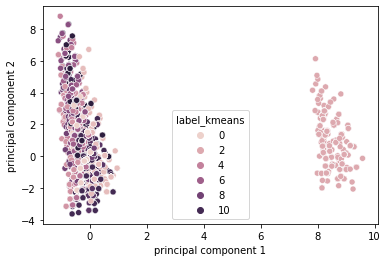

In [19]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

### Lower

In [20]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_lower.to_csv("df_lower.csv")

In [22]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

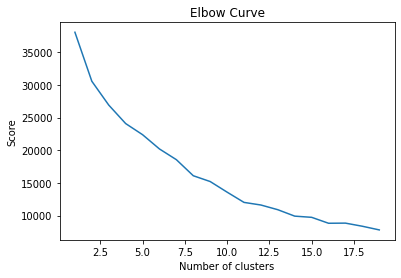

In [23]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [24]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [25]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [26]:
import pickle
filename = 'df_lower_kmeans.pkl'
pickle.dump(kmeans_lower, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [27]:
centers_lower = kmeans_lower.cluster_centers_

In [28]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,1.993700,0.954166
1,-0.256141,-0.203148
2,-1.563668,-0.324464
3,0.885504,0.427494
4,-0.422023,0.306178
...,...,...
58958,-1.563668,-0.324464
58959,-1.563668,-0.324464
58960,-1.563668,-0.324464
58961,-0.256141,-0.203148


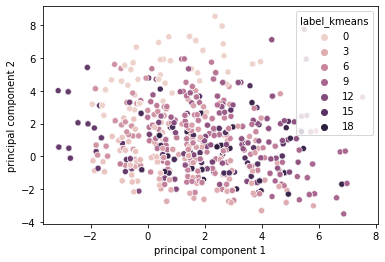

In [29]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

### Top bottom rating table

In [34]:
# userrating = []

# for i in range(0,100):
#     x = random.randint(1,5)
#     userrating.append(x)

# top=[]
# bottom=[]
# for i in range(0,100):
#     x = random.randint(1,139704)
#     top.append(x)
#     y = random.randint(1,139704)
#     bottom.append(y)
downloadedRating = drive.CreateFile({'id':"10zqzA3-v8VfU37v7jxcaE4wbj-L0oRKg"})
downloadedRating.GetContentFile('rating.csv')

In [35]:
# df_top_bottom_rating = pd.DataFrame({'top': pd.Series(top), 'bottom': pd.Series(bottom), 'itemRating':pd.Series(userrating)})
# df_top_bottom_rating
df_top_bottom_rating = pd.read_csv('rating.csv')
df_top_bottom_rating.head()

,Unnamed: 0,top,bottom,itemRating
0,0,8188,52013,4.0
1,1,9532,39863,5.0
2,2,2541,55868,1.0
3,3,25719,52417,4.0
4,4,25701,13091,5.0


In [36]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]

In [37]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

## Cluster mapping

In [38]:
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,0,8188,52013,4.0,0,11
1,1,9532,39863,5.0,0,2
2,2,2541,55868,1.0,11,1
3,3,25719,52417,4.0,0,4
4,4,25701,13091,5.0,0,1
...,...,...,...,...,...,...
70,70,60532,5934,1.0,11,10
71,71,138258,55322,5.0,0,18
72,72,5850,53159,3.0,6,1
73,73,90409,58203,3.0,0,11


In [39]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,0,11,4.0
1,0,2,5.0
2,11,1,1.0
3,0,4,4.0
4,0,1,5.0
...,...,...,...
70,11,10,1.0
71,0,18,5.0
72,6,1,3.0
73,0,11,3.0


In [40]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average.to_csv("cluster_mapping_average.csv")

## Collaborative Filtering

In [41]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,0,3.000000
1,0,1,3.466667
2,0,2,3.466667
3,0,4,4.000000
4,0,5,2.000000
5,0,8,5.000000
6,0,11,4.000000
7,0,12,2.000000
8,0,14,4.000000
9,0,18,2.500000


In [42]:
df_ratings = cluster_mapping_average.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')
df_ratings

bottomClusterRating,0,1,2,4,5,7,8,10,11,12,14,18
topClusterRating,,,,,,,,,,,,
0,3.0,3.466667,3.466667,4.0,2.0,NaN,5.0,NaN,4.0,2.0,4.0,2.5
3,NaN,2.000000,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,2.5


In [43]:
df_ratings_clean = df_ratings.fillna(0)
df_ratings_clean.head()
df_ratings_clean.to_csv("df_ratings_clean.csv", index=False)

In [44]:
df_ratings_clean_T = df_ratings_clean.T
df_ratings_clean_T

topClusterRating,0,3,4,5,6,7,11
bottomClusterRating,,,,,,,
0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,3.466667,2.0,3.0,0.0,3.0,4.0,1.0
2,3.466667,0.0,3.0,0.0,0.0,0.0,2.5
4,4.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,2.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,3.0,0.0,0.0,0.0,0.0,0.0
8,5.000000,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
11,4.000000,0.0,3.0,0.0,0.0,0.0,4.0


In [45]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=7, random_state=5)
resultant_matrix = SVD.fit_transform(df_ratings_clean)
resultant_matrix=pd.DataFrame(resultant_matrix)
resultant_matrix.to_csv("resultant_matrix.csv")

In [46]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)


In [47]:
## find bottoms matching to top

col_idx = df_ratings_clean.columns.get_loc(1)
print("col_idx", col_idx)
corr_specific = corr_mat[col_idx]
bottomMatchingTops=pd.DataFrame({'corr_specific':corr_specific, 'bottom_corr_specific': df_ratings_clean_T.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)
# bottomMatchingTops
bottomMatchingTops=bottomMatchingTops.bottom_corr_specific.iloc[0:3].tolist()
bottomMatchingTops

col_idx 1


[3, 7, 6]

In [48]:

## Todo: api to pass the top bottom cluster values

In [49]:
topClusterResult=[]
for i in bottomMatchingTops:
  print("i", i)
  topCluster=cluster_mapping_average[cluster_mapping_average["topClusterRating"]==i].topClusterRating
  topClusterResult.append(topCluster.iloc[0])
topClusterResult

i 3
i 7
i 6


[3, 7, 6]

In [50]:
df_topClusterResult=[]
for i in topClusterResult:
  topItems_df=df_top_bottom_rating[df_top_bottom_rating["topClusterRating"]==i].sort_values('itemRating', ascending=False)
  df_topClusterResult.append(topItems_df)
df_topClusterResult = pd.concat(df_topClusterResult)
df_topClusterResult=df_topClusterResult.sort_values('itemRating', ascending=False)
df_topClusterResult

,Unnamed: 0,top,bottom,itemRating,topClusterRating,bottomClusterRating
40,40,9339,34847,5.0,7,1
64,64,30199,47108,3.0,3,7
37,37,8323,44818,3.0,7,1
34,34,11983,51831,3.0,6,12
72,72,5850,53159,3.0,6,1
22,22,94928,16235,2.0,3,1


In [51]:
topLocationIndex=df_topClusterResult.top.sample(n=5)
topLocationIndex=topLocationIndex.to_numpy().tolist()
topLocationIndex

[30199, 5850, 94928, 8323, 11983]

Todo: implementing functions

In [52]:
attributes=[]
for i in topLocationIndex:
  if i in df_upper.index:
    attributes.append(i)
    
attributes

[30199, 5850, 94928, 8323, 11983]

In [53]:
test=df_upper.iloc[attributes]
test

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
30199,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,4
5850,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,2
94928,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,11
8323,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,2
11983,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,2
